# Phishing URL Detection 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from ucimlrepo import fetch_ucirepo 
import seaborn as sns 


##  Investigating  the data set 

* Dataset consist  of 30 features 
* No null values present 

In [3]:

  
# fetch dataset 
phishing_websites = fetch_ucirepo(id=327) 
  
# data (as pandas dataframes) 
X = phishing_websites.data.features 
y = phishing_websites.data.targets 
  
# metadata 
print(phishing_websites.metadata) 
  
# variable information 
print(phishing_websites.variables) 


{'uci_id': 327, 'name': 'Phishing Websites', 'repository_url': 'https://archive.ics.uci.edu/dataset/327/phishing+websites', 'data_url': 'https://archive.ics.uci.edu/static/public/327/data.csv', 'abstract': 'This dataset collected mainly from: PhishTank archive, MillerSmiles archive, Googleâ€™s searching operators.', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 11055, 'num_features': 30, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Tue Mar 05 2024', 'dataset_doi': '10.24432/C51W2X', 'creators': ['Rami Mohammad', 'Lee McCluskey'], 'intro_paper': {'ID': 396, 'type': 'NATIVE', 'title': 'An assessment of features related to phishing websites using an automated technique', 'authors': 'R. Mohammad, F. Thabtah, L. Mccluskey', 'venue': 'International Conference for Internet Tec

## All the features are categorical and encoded :
*  1 - Legitimate ✅
*  0 - Suspicious 🤔
* -1 - Phishing    ❌ 

In [4]:
X

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,rightclick,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,-1,1,1,-1,-1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,1,-1,1,1,1,1,1,1,-1,1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,1,-1,1,0,1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,1,-1,1,1,1,1,-1,1,1,1


# Output 
*  1 - Legitimate ✅
* -1 - Phishing    ❌ 

In [5]:
y

,result
0,-1
1,-1
2,-1
3,-1
4,1
...,...
11050,1
11051,-1
11052,-1
11053,-1


In [6]:
X.size

331650

In [7]:
#Making a data frame to plot pairplot 
df= pd.DataFrame(X)
df['label']=y
df

,having_ip_address,url_length,shortining_service,having_at_symbol,double_slash_redirecting,prefix_suffix,having_sub_domain,sslfinal_state,domain_registration_length,favicon,...,popupwindow,iframe,age_of_domain,dnsrecord,web_traffic,page_rank,google_index,links_pointing_to_page,statistical_report,label
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11050,1,-1,1,-1,1,1,1,1,-1,-1,...,-1,-1,1,1,-1,-1,1,1,1,1
11051,-1,1,1,-1,-1,-1,1,-1,-1,-1,...,-1,1,1,1,1,1,1,-1,1,-1
11052,1,-1,1,1,1,-1,1,-1,-1,1,...,1,1,1,1,1,-1,1,0,1,-1
11053,-1,-1,1,1,1,-1,-1,-1,1,-1,...,-1,1,1,1,1,-1,1,1,1,-1


#### Here we can see None of the features are heavily correlated this eradicates the need of 
####  performing feature selection 

In [8]:
#Finding Correlation between features ad output 
correlation= df.corr()
# View correlation of every feature with the label
correlation_with_label = correlation['label'].sort_values(ascending=False)
print(correlation_with_label)

label                         1.000000
sslfinal_state                0.714741
url_of_anchor                 0.692935
prefix_suffix                 0.348606
web_traffic                   0.346103
having_sub_domain             0.298323
request_url                   0.253372
links_in_tags                 0.248229
sfh                           0.221419
google_index                  0.128950
age_of_domain                 0.121496
page_rank                     0.104645
having_ip_address             0.094160
statistical_report            0.079857
dnsrecord                     0.075718
url_length                    0.057430
having_at_symbol              0.052948
on_mouseover                  0.041838
port                          0.036419
links_pointing_to_page        0.032574
submitting_to_email           0.018249
rightclick                    0.012653
popupwindow                   0.000086
favicon                      -0.000280
iframe                       -0.003394
redirect                 

# Data Visualization 

* Plotting a Heatmap to understand the Correlation better  

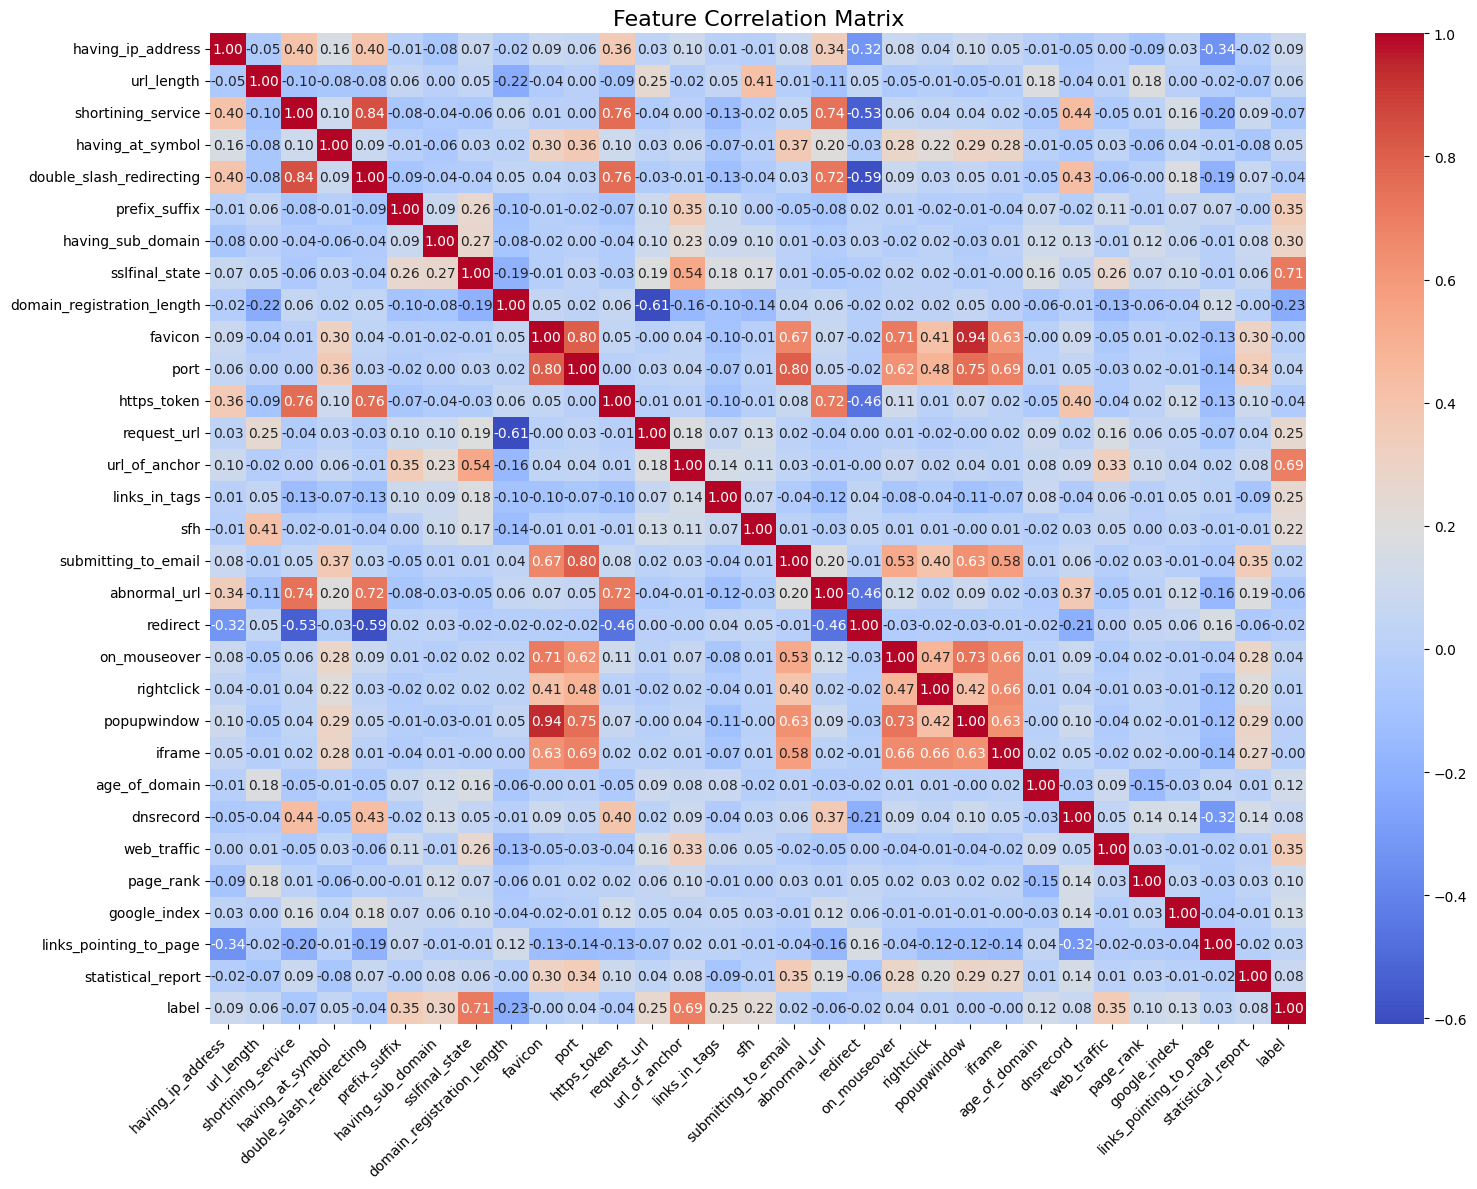

In [9]:
plt.figure(figsize=(16, 12))  # Increase size a bit more
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Building the Machine Learning Model 
* As all the features are categorical and  the only value  they take is 
  -1,0,1 . So decision tree was best suited . However  there are high chances of overfitting the data with such 
  large no of features . 
* So Random forest is the best suited algorithm in our opinion to prevent overfitting 

In [10]:
#Starting with Random Forest 

from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix

* Splitting the dataset into train and test (80/20 rule)

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)
X_train.shape , X_test.shape

((8844, 30), (2211, 30))

#### Initializing the Random Forest Classifier 🌲

In [12]:
rf_model = RandomForestClassifier(n_estimators=100 , random_state=42)
rf_model.fit(X_train,y_train)

c:\Users\aditi\Desktop\PYTHON\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [13]:
y_pred= rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9669832654907282
Classification Report:
               precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211

Confusion Matrix:
 [[ 909   47]
 [  26 1229]]


#### Plotting Feature importance to see  what is the percentage contribution of each feature in decision making 

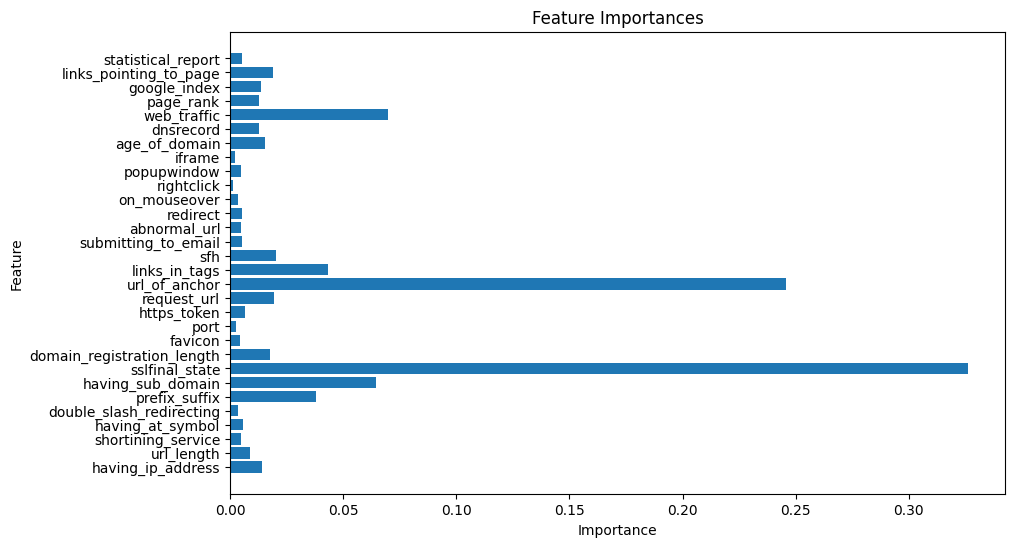

In [14]:
#Checking Feature importance 
importances = rf_model.feature_importances_
features= X.columns 

#Plot top important features 
plt.figure(figsize=(10,6))
plt.barh(features , importances )
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

* Here we can clearly see that  'rightclick' & 'iframe' have very near to 0 contribution so we can  try dropping them 
and see how  does the model do any better 

In [15]:
corr= df.corr()
print(corr['rightclick'])

having_ip_address             0.042881
url_length                   -0.013613
shortining_service            0.038118
having_at_symbol              0.219503
double_slash_redirecting      0.025863
prefix_suffix                -0.024868
having_sub_domain             0.018230
sslfinal_state                0.015854
domain_registration_length    0.023520
favicon                       0.414382
port                          0.481631
https_token                   0.009265
request_url                  -0.020452
url_of_anchor                 0.022168
links_in_tags                -0.037469
sfh                           0.008467
submitting_to_email           0.398629
abnormal_url                  0.023710
redirect                     -0.023586
on_mouseover                  0.474054
rightclick                    1.000000
popupwindow                   0.415268
iframe                        0.655863
age_of_domain                 0.006764
dnsrecord                     0.038255
web_traffic              

# Hyperparameter Tuning 

* Tuning the hyperparameters using RandomizedSearchCV to find the best suited parameters


In [16]:
#HyperParameter Tuning 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 4)
}

In [17]:
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    scoring='f1',
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\aditi\Desktop\PYTHON\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': 42, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 126}
Best Score: 0.9730029593984817


#  Hurray ! 🥳

## Accuracy went from 96.66% ---> 97.40%

In [18]:
best_model= random_search.best_estimator_
best_model.fit(X_train,y_train)
y_pred_final= best_model.predict(X_test)
print("Classification Report : \n", classification_report(y_test,y_pred_final))

c:\Users\aditi\Desktop\PYTHON\.venv\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Report : 
               precision    recall  f1-score   support

          -1       0.97      0.95      0.96       956
           1       0.96      0.98      0.97      1255

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [19]:
from sklearn.tree import export_graphviz
import graphviz

# Select one tree from the forest
estimator = best_model.estimators_[0]

# Export to DOT format
dot_data = export_graphviz(
    estimator,
    out_file=None,
    feature_names=X_train.columns,
    class_names=['Legit', 'Phish'],
    filled=True,
    rounded=True,
    special_characters=True
)

# Render and open it as a scrollable, zoomable PDF
graph = graphviz.Source(dot_data)
graph.render("random_forest_tree", format="pdf", view=True)  # Saves & opens PDF


'random_forest_tree.pdf'

In [61]:
from IPython.display import display
display(graph)


# Saving & Loading  Model 

* Since our Model is fully trained now , we cam save it using joblib library 
* It is saved in pickle format and can be loaded whenever we need it , this way we dont have to make and train a model everytime 
* We can load the model with the existing trained parameters 

In [20]:
#Saving the  Model in pickle format 
import joblib

joblib.dump(best_model, 'rf_phishing_model.pkl')

['rf_phishing_model.pkl']

In [21]:
#Loading the model 
import joblib 
import numpy as np 
import pandas as pd
model = joblib.load('rf_phishing_model.pkl')

#### Testing out the model on some random test cases 

In [22]:
arr=np.array([-1,1,1,1,-1,-1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,-1,0,1,1,1,1,-1,-1,-1,-1,1,1,-1])
arr=arr.reshape(1,-1)
arr.shape
ans=model.predict(arr)
print("Prediction:", "🚨 Phishing" if ans == -1 else "✅ Legitimate")


Prediction: 🚨 Phishing


c:\Users\aditi\Desktop\PYTHON\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# The Main Part 😱 DATA ENGINEERING 
* Task : To convert a raw URL into 30 features keeping in mind the constraints 
   these functions can also be used to prepare a dataset , if  someone wants .

In [23]:
#Converting a Raw URL into input form 
#So that it can be used by the model 


import requests
import re   #For handling regex expression 
from urllib.parse import urlparse
import ssl
import socket
from urllib.parse import urlparse
from datetime import datetime, timezone
from urllib.parse import urlparse
import whois

from bs4 import  BeautifulSoup 
from urllib.parse import urlparse , urljoin 




In [24]:
#Manually accessing data using html parser in beautifulSoup 
url="https://archive.ics.uci.edu/dataset/327/phishing+websites"
html=requests.get(url).text
soup = BeautifulSoup(html, "html.parser")
soup


<!DOCTYPE html>

<html data-theme="light" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<meta content="Discover datasets around the world!" name="description"/>
<link href="/favicon.ico" rel="icon"/>
<link href="/apple-touch-icon.png" rel="apple-touch-icon"/>
<!-- Provides metadata used when the app is installed on a mobile device or desktop. -->
<!-- See https://developers.google.com/web/fundamentals/web-app-manifest/ -->
<link href="/manifest.json" rel="manifest"/>
<title>UCI Machine Learning Repository</title>
<link href="../../_app/immutable/assets/0.a24920d2.css" rel="stylesheet"/>
<link href="../../_app/immutable/assets/Autocomplete.3d8e18c6.css" rel="stylesheet"/>
<link href="../../_app/immutable/assets/Stars.6f31e607.css" rel="stylesheet"/>
<link href="../../_app/immutable/assets/JsonDiff.b38ce334.css" rel="stylesheet"/>
<link href="../../_app/immutable/assets/Variables.ad52176b.css" rel="stylesheet"/><title>Ph

In [25]:

def having_ip_address(url):
    ip_pattern = r'http[s]?://(?:\d{1,3}\.){3}\d{1,3}'

    if re.match(ip_pattern,url):
        return -1
    else :
        return 1
    

#Sample
print(having_ip_address(url))



1


In [26]:
def url_length(url):
    
    length= len(url)

    if(length<54):
         return 1 #legitimate
    elif(length >=54 and length<=75):
         return 0 #Suspicious
    elif(length>75):
         return -1 #Phishing 
    
print(url_length(url))

0


In [27]:
#It checks whether the url uses a shortining service to hide its true destination 
#for exaple bit.ly , goo.gl, tinyurl.com 
#If any such string is found inside the url means it is a phishing url 

def shortining_service(url):
    shortening_services = r"bit\.ly|goo\.gl|shorte\.st|tinyurl\.com|ow\.ly|t\.co|bitly\.com"
    return -1 if re.search(shortening_services, url) else 1

print(shortining_service(url))


1


In [28]:
#It checks if the URL 

def having_at_symbol(url):
    at_symbol= r"@"
    return -1 if re.search(at_symbol,url) else 1

print(having_at_symbol(url))

1


In [29]:
#It checks if the URl is redirectig it using somewhere else 
#We will skip the first 8 characters and check if any // occurs

def double_slash_redirecting(url):

    last_double_slash= url.find('//', 8)

    if last_double_slash==-1:
        return 1
    else: 
        return -1
    
print(double_slash_redirecting(url))



1


In [30]:

#Looks for - in the domain name 
#legitimate websites dont use - in their domain name 
def prefix_suffix(url):

    domain_name= urlparse(url).netloc

    if '-' in domain_name :
         return -1
    else : 
         return 1
    

print(prefix_suffix("http://www.paypal-secure-login.com"))
    

-1


In [31]:
#Sub Domain & Multi Sub Domain 
def having_sub_domain(url):
    domain = urlparse(url).netloc

    #Remove www.
    if domain.startswith('www.'):
        domain = domain[4:]
    
    domain_parts = domain.split('.')

    if len(domain_parts) >2:
        domain_parts = domain_parts[:-2]
    
    elif len(domain_parts) >1:
        domain_parts= domain_parts[:-1]
    
    
    dots = len(domain_parts)-1

    if dots ==0 :
        return 1
    
    elif dots ==1:
        return 0
    
    else :
        return -1
    
print(having_sub_domain(url))



0


In [32]:

def sslfinal_state(url):
    trusted_issuers = [
        "DigiCert", "GoDaddy", "GeoTrust", "GlobalSign", "Comodo", "Sectigo",
        "Thawte", "RapidSSL", "Entrust", "Network Solutions", "VeriSign",
        "Let's Encrypt", "SSL.com", "Trustwave", "Symantec", 
        "Amazon Trust Services", "Cloudflare", "IdenTrust", "Buypass", "Gandi",
        "Google Trust Services"
    ]

    check_issuer = False
    check_age = False
    check_https = urlparse(url).scheme == "https"

    hostname = urlparse(url).netloc
    if hostname.startswith("www."):
        hostname = hostname[4:]

    try:
        context = ssl.create_default_context()
        with socket.create_connection((hostname, 443), timeout=5) as sock:
            with context.wrap_socket(sock, server_hostname=hostname) as ssock:
                cert = ssock.getpeercert()
                issuer = dict(x[0] for x in cert.get('issuer', []))
                issuer_name = issuer.get("organizationName", "")

                check_issuer = any(trusted in issuer_name for trusted in trusted_issuers)

                start_date_str = cert.get('notBefore')
                if start_date_str:
                    start_date = datetime.strptime(start_date_str, "%b %d %H:%M:%S %Y %Z")
                    start_date = start_date.replace(tzinfo=timezone.utc)
                    age_days = (datetime.now(timezone.utc) - start_date).days
                    check_age = age_days >= 365

    except Exception as e:
        # Optional: print or log the error
        # print(f"SSL check failed for {hostname}: {e}")
        return -1  # Treat failures as suspicious/phishing

    # Decision logic
    if check_https and check_issuer and check_age:
        return 1  # Legitimate
    elif check_https and check_issuer and not check_age:
        return 0  # Suspicious
    elif check_https and not check_issuer and check_age:
        return 0  # Suspicious
    elif check_https and not check_issuer and not check_age:
        return -1  # Phishing
    else:
        return -1  # Phishing (no HTTPS)


In [33]:


def domain_registration_length(url):
    try:
        domain_name = urlparse(url).netloc
        if domain_name.startswith('www.'):
            domain_name = domain_name[4:]

        domain_details = whois.whois(domain_name)

        creation_date = domain_details.creation_date
        expiration_date = domain_details.expiration_date

        # Handle multiple date entries (lists)
        if isinstance(creation_date, list):
            creation_date = creation_date[0]
        if isinstance(expiration_date, list):
            expiration_date = expiration_date[0]

        # If dates are missing or invalid
        if creation_date is None or expiration_date is None:
            return -1

        registration_length = (expiration_date - creation_date).days

        if registration_length >= 365:
            return 1
        else:
            return -1

    except Exception as e:
        # Print error if needed for debugging: print(f"Error: {e}")
        return -1  # Default to phishing behavior if check fails

    
print(domain_registration_length("https://code.visualstudio.com/docs/copilot/setup"))


1


In [34]:
# To check favicon if it is loaded from an external domain 
#Then it is a phishing website 



def favicon(url):
    try:
        response = requests.get(url, timeout=5)
        soup = BeautifulSoup(response.text, 'html.parser')

        domain = urlparse(url).netloc.replace("www.", "")
        icon_links = soup.find_all("link", rel=lambda x: x and 'icon' in x.lower())

        if not icon_links:
            return 1  # No favicon found, treat as not suspicious

        for tag in icon_links:
            href = tag.get("href")
            if href:
                favicon_url = urljoin(url, href)
                favicon_domain = urlparse(favicon_url).netloc.replace("www.", "")
                
                if domain not in favicon_domain:
                    return -1  # Suspicious
                else:
                    return 1   # Not suspicious

        return 1  # If none had href, still return something

    except Exception as e:
        print(f"Error: {e}")
        return 1  # Default to not suspicious on failure

# Example usage:
print(favicon("https://www.google.com/"))

                                                                    

1


In [35]:
import socket
from urllib.parse import urlparse

def scan_ports(hostname, ports):
    open_ports = []
    try:
        for port in ports:
            sock = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
            sock.settimeout(1)  # Timeout after 1 second
            result = sock.connect_ex((hostname, port))
            if result == 0:
                open_ports.append(port)
            sock.close()
        return open_ports
    except socket.error as e:
        return []


def port(url):
    preferred_open_ports = {22, 53, 80, 443}
    
    hostname = urlparse(url).netloc
    if hostname.startswith('www.'):
        hostname = hostname[4:]

    try:
        open_ports = scan_ports(
            hostname,
            ports=[
                20, 21, 22, 23, 25, 53, 69, 80, 110, 135, 139,
                443, 445, 995, 1433, 3306, 3389, 4444,
                6660, 6661, 6662, 6663, 6664, 6665, 6666,
                6667, 6668, 6669
            ]
        )
    except Exception as e:
        return -1

    print("Open ports:", open_ports)

    if open_ports:
        for port in open_ports:
            if port not in preferred_open_ports:
                return -1
        return 1
    else:
        return -1




In [36]:

def https_token(url):
    domain = urlparse(url).netloc
    return -1 if "https" in domain.lower() else 1 

https_token("http://https-www-paypal-it-webapps-mpp-home.soft-hair.com/")

trusted_cdns = [
            "akamai.net", "akamaized.net", "cloudflare.com", "cdn.cloudflare.net", "cloudfront.net",
            "gstatic.com", "googleapis.com", "googleusercontent.com", "azureedge.net", "msecnd.net",
            "fbcdn.net", "facebook.net", "twimg.com", "ytimg.com", "youtube.com", "nflxext.com",
            "nflximg.net", "nflxvideo.net", "apple.com", "icloud.com", "fastly.net", "stackpathcdn.com",
            "stackpathdns.com", "bootstrapcdn.com", "jsdelivr.net", "cdnjs.com", "imgur.com", "githubusercontent.com"
        ]



In [37]:
from urllib.parse import urlparse
import requests
from bs4 import BeautifulSoup

def request_url(url):
    try:
        domain = urlparse(url).netloc
        if domain.startswith("www."):
            domain = domain[4:]
        html = requests.get(url).text
        soup = BeautifulSoup(html, "html.parser")

        total = 0
        external = 0

       
        for tag, attr in [('img', 'src'), ('script', 'src'), ('link', 'href'),
                          ('iframe', 'src'), ('video', 'src'), ('audio', 'src'),
                          ('embed', 'src'), ('object', 'data')]:

            for element in soup.find_all(tag):
                src = element.get(attr)
                if src and src.startswith("http"):
                    domain_src = urlparse(src).netloc
                    if domain_src.startswith("www."):
                        domain_src = domain_src[4:]

                    if domain_src != domain and not any((domain_src.endswith(cdn) or domain_src==cdn) for cdn in trusted_cdns):
                        external += 1
                    total += 1

        if total == 0:
            return 1

        percent = (external / total) * 100

        if percent < 22:
            return 1
        elif percent >= 22 and percent < 61:
            return 0
        else:
            return -1
        
    except Exception as e:
        
        return -1
    
# request_url("https://www.apple.com/in/store?cid=aos-IN-kwgo-brand")
    



In [38]:
#hrefs in nchor can't contain cdns because cds are used for 
#resources like images 
# and not for navigating 

from urllib.parse import urlparse
import requests
from bs4 import BeautifulSoup

def url_of_anchor(url):
    try:
        domain = urlparse(url).netloc
        if domain.startswith("www."):
            domain = domain[4:]

        html = requests.get(url).text
        soup = BeautifulSoup(html, "html.parser")

        total = 0
        unsafe = 0

        for a in soup.find_all("a", href=True):
            href = a['href']
            total += 1

            # Case 1: Fake/Null anchors
            if href in ["#", "#content", "#skip", "javascript:void(0)", "javascript::void(0)"]:
                unsafe += 1
            # Case 2: External links
            elif href.startswith("http"):
                href_domain = urlparse(href).netloc
                if href_domain.startswith("www."):
                    href_domain = href_domain[4:]
                if not (href_domain == domain or href_domain.endswith("." + domain)):

                    unsafe += 1

        if total == 0:
            return 1

        percent = (unsafe / total) * 100

        if percent < 31:
            return 1
        elif percent >= 31 and percent < 67:
            return 0
        else:
            return -1

    except Exception as e:
        print("Error:", e)
        return -1

url_of_anchor("https://www.netflix.com/browse")

1

In [39]:
def links_in_tags(url):
    try:
        domain = urlparse(url).netloc
        if domain.startswith("www."):
            domain = domain[4:]

        html = requests.get(url).text
        soup = BeautifulSoup(html, "html.parser")

        total = 0
        external = 0

        tags_attrs = [
            ('meta', 'content'),
            ('script', 'src'),
            ('link', 'href')
        ]

        
    
        for tag, attr in tags_attrs:
            for element in soup.find_all(tag):
                src = element.get(attr)
                if src and src.startswith("http"):
                    src_domain = urlparse(src).netloc
                    
                    if src_domain.startswith("www."):
                        src_domain = src_domain[4:]
                    total += 1
                    if src_domain != domain and not any((src_domain.endswith('.' + cdn) or src_domain==cdn) for cdn in trusted_cdns):
                        external += 1

        if total == 0:
            return 1  # Safe by default if nothing to evaluate

        percent = (external / total) * 100

        if percent < 17:
            return 1
        elif 17 <= percent <= 81:
            return 0
        else:
            return -1

    except Exception as e:
        print("Error:", e)
        return -1
    

links_in_tags("https://www.netflix.com/browse")


1

In [40]:
#If server form handler constains blank or some other domain then it is phishing 
def sfh(url):
    try:
        domain = urlparse(url).netloc
        if domain.startswith("www."):
            domain = domain[4:]

        html = requests.get(url, timeout=5).text
        soup = BeautifulSoup(html, "html.parser")

        for form in soup.find_all("form"):
            action = form.get("action")

            if not action or action.strip().lower() == "about:blank":
                return -1 

     
            if action.startswith("http"):
                action_domain = urlparse(action).netloc
                if action_domain.startswith("www."):
                    action_domain = action_domain[4:]

                if action_domain != domain:
                    return 0  

        return 1 

    except Exception as e:
        print(f"Error: {e}")
        return -1
    

sfh("https://www.netflix.com/browse")

1

In [41]:
import re 
import requests

def submitting_to_email(url):
    try:
        html = requests.get(url, timeout=5).text
        soup = BeautifulSoup(html, "html.parser")

        # Check for "mailto:" in form actions or hrefs
        for tag in soup.find_all(['form', 'a']):
            action = tag.get('action', '') or tag.get('href', '')
            if action and 'mailto:' in action.lower():
                return -1  # Phishing

        # Check for "mail()" in inline scripts or <script> tags
        scripts = soup.find_all('script')
        for script in scripts:
            if script.string and 'mail(' in script.string.lower():
                return -1  # Phishing

        # You can also scan the raw HTML if needed
        if 'mailto:' in html.lower() or re.search(r'\bmail\s*\(', html.lower()):
            return -1  # Phishing

        return 1  # Legitimate

    except Exception as e:
        print(f"Error: {e}")
        return -1  # Treat errors conservatively as phishing
    
submitting_to_email("https://www.netflix.com/browse")
    

    




1

In [42]:
import tldextract
from urllib.parse import urlparse

def abnormal_url(url):
    try:
        extracted = tldextract.extract(url)
        registered_domain = f"{extracted.domain}.{extracted.suffix}"  # e.g., secure-update.ru
        full_domain = urlparse(url).netloc.lower()

        # If full domain == registered domain OR starts with 'www.' + registered domain → legitimate
        if full_domain == registered_domain or full_domain == f"www.{registered_domain}":
            return 1  # Legitimate
        else:
            return -1  # Abnormal (possibly phishing)
    except:
        return -1


abnormal_url("https://www.linkedin.com/in/devyani-rana-b822982b0")

1

In [43]:

import requests

def redirect(url):
    try:
        # Make a request with redirection enabled
        response = requests.get(url, allow_redirects=True, timeout=5)

        # Count number of redirects
        num_redirects = len(response.history)

        # Apply the rule
        if num_redirects <= 1:
            return 1  # Legitimate
        elif 2 <= num_redirects < 4:
            return 0  # Suspicious
        else:
            return -1  # Phishing

    except Exception as e:
        print("Error:", e)
        return -1  # Considered Phishing or Inaccessible
    

redirect("https://www.linkedin.com/in/devyani-rana-b822982b0")


1

In [44]:
import requests
from bs4 import BeautifulSoup
import re

def on_mouseover(url):
    try:
        html = requests.get(url, timeout=5).text
        soup = BeautifulSoup(html, "html.parser")

        # Search for onMouseOver attributes in all tags
        for tag in soup.find_all(onmouseover=True):
            js_code = tag['onmouseover'].lower()

            # Check if it manipulates the status bar
            if "window.status" in js_code or "status=" in js_code:
                return -1  # Phishing

        return 1  # Legitimate

    except Exception as e:
        print("Error:", e)
        return -1

on_mouseover("https://www.linkedin.com/in/devyani-rana-b822982b0")

1

In [45]:
import requests
import re

def right_click(url):
    try:
        html = requests.get(url, timeout=5).text.lower()

        # Check for JavaScript that disables right-click
        if re.search(r"event\.button\s*==\s*2", html) or \
   re.search(r"event\.which\s*==\s*3", html) or \
   ("contextmenu" in html and "return false" in html):
            return -1  # Phishing
        else:
            return 1   # Legitimate

    except Exception as e:
        print("Error:", e)
        return -1
    


right_click("https://www.linkedin.com/in/devyani-rana-b822982b0")

1

In [46]:
import re
import requests
from bs4 import BeautifulSoup

def popupwindow(url):
    try:
        html = requests.get(url).text
        soup = BeautifulSoup(html, "html.parser")

        # Step 1: Search for popup-related JavaScript code
        if "window.open" in html or "showModalDialog" in html:
            # Step 2: Check for input fields in pop-up (simplified as presence of <input> after popup)
            popup_related_scripts = re.findall(r'window\.open\((.*?)\)', html, re.DOTALL)
            for script in popup_related_scripts:
                if "<input" in script or "type=\"text\"" in script or "type=\"password\"" in script:
                    return -1  # Phishing

            # Step 3: Fallback: if HTML contains popups AND inputs anywhere near them
            if re.search(r'window\.open.*<input', html, re.DOTALL):
                return -1  # Phishing

        return 1  # Legitimate (no pop-up input)

    except:
        return 1  # Default to Legitimate if something goes wrong
    

popupwindow("https://www.amazon.in/slc/hub?disablePicker=1&shoppingAs=1&ref=sl_ph_navpicker&encodedActorId=AAAAAAAAAQDlmo4Y2NsVK4TM0nmDlPJoQQAAAAAAAABusLSF0h4WCy8N6Hp%2FSz92T8eGQSbiBa2JxQkMZ1%2BwqpHpSiOsXhiimYvIqQY4o9V0SFUtwWwr0%2F7G3QYibJT6Fw%3D%3D&qap=")



1

In [47]:

import requests
from bs4 import BeautifulSoup

def iframe(url):
    try:
        html = requests.get(url).text
        soup = BeautifulSoup(html, "html.parser")

        # Search for any iframe tag
        if soup.find("iframe"):
            return -1  # Phishing
        else:
            return 1   # Legitimate

    except:
        return -1  # Treat as phishing if there's an error fetching/analyzing
    


iframe("https://www.amazon.in/slc/hub?disablePicker=1&shoppingAs=1&ref=sl_ph_navpicker&encodedActorId=AAAAAAAAAQDlmo4Y2NsVK4TM0nmDlPJoQQAAAAAAAABusLSF0h4WCy8N6Hp%2FSz92T8eGQSbiBa2JxQkMZ1%2BwqpHpSiOsXhiimYvIqQY4o9V0SFUtwWwr0%2F7G3QYibJT6Fw%3D%3D&qap=")


1

In [48]:
import whois
from datetime import datetime

def age_of_domain(url):
    try:
        w = whois.whois(url)

        creation_date = w.creation_date
        if isinstance(creation_date, list):  # handle multiple creation dates
            creation_date = creation_date[0]

        if not creation_date:
            return -1  # No creation date found = suspicious

        age_in_months = (datetime.now() - creation_date).days // 30

        if age_in_months >= 6:
            return 1  # Legitimate
        else:
            return -1  # Phishing

    except Exception as e:
        print("WHOIS error:", e)
        return -1  # Treat as phishing if WHOIS info is not available
    


age_of_domain("https://www.amazon.in/slc/hub?disablePicker=1&shoppingAs=1&ref=sl_ph_navpicker&encodedActorId=AAAAAAAAAQDlmo4Y2NsVK4TM0nmDlPJoQQAAAAAAAABusLSF0h4WCy8N6Hp%2FSz92T8eGQSbiBa2JxQkMZ1%2BwqpHpSiOsXhiimYvIqQY4o9V0SFUtwWwr0%2F7G3QYibJT6Fw%3D%3D&qap=")


1

In [49]:
import socket
from urllib.parse import urlparse

def dnsrecord(url):
    try:
        domain = urlparse(url).netloc
        if domain.startswith("www."):
            domain = domain[4:]

        # Attempt to resolve the domain
        socket.gethostbyname(domain)
        return 1  # DNS record exists → Legitimate

    except socket.gaierror:
        return -1  # DNS resolution failed → Phishing

    except Exception as e:
        print("Error:", e)
        return -1
    

dnsrecord("https://www.amazon.in/slc/hub?disablePicker=1&shoppingAs=1&ref=sl_ph_navpicker&encodedActorId=AAAAAAAAAQDlmo4Y2NsVK4TM0nmDlPJoQQAAAAAAAABusLSF0h4WCy8N6Hp%2FSz92T8eGQSbiBa2JxQkMZ1%2BwqpHpSiOsXhiimYvIqQY4o9V0SFUtwWwr0%2F7G3QYibJT6Fw%3D%3D&qap=")



1

In [50]:
import pandas as pd 

tranco_df = pd.read_csv("C:\\Users\\aditi\\Downloads\\tranco_83NKV (1).csv", header=None, names=["rank", "domain"])
tranco_set = set(tranco_df["domain"])
tranco_set

{'bprewards.com.au',
 'starbucks.com.hk',
 'privtracker.com',
 'itn.gr',
 'edfinancial.com',
 'nalogirb.by',
 'modb.pro',
 'livebook1.com',
 'roharoagloh.net',
 'herohosty.xyz',
 'fantasylife.com',
 'brigadi.by',
 'mntkcheb.ru',
 'tosimplyinspire.com',
 'smartpolls.co.uk',
 'speakercleaner.in',
 'marshandparsons.co.uk',
 'epresskitz.com',
 'keyaseth.com',
 'gloshecaiz.com',
 'creamvids.es',
 'indianahousedemocrats.org',
 'allarts.org',
 'thethirdwave.co',
 'mondopresepi.com',
 'blagayavest.info',
 'securasp.fi',
 'cdneurops.health',
 'mup.hr',
 'pin-up-cazino.kz',
 'rijeka.hr',
 'autobid.de',
 'zaycevnet.net',
 'belanjamulu.com',
 'ornament.app',
 'e-change.io',
 'lotoclubio.com',
 'deerassociation.com',
 'designdirectory.com',
 'slotsoft.net',
 'datapipe.com',
 'northlincs.gov.uk',
 'webpark.ch',
 'slatefinch.com',
 'energycom.gov.gh',
 'pantheonroma.com',
 'miprosegur.com',
 'propertyrecs.com',
 'heimalesssinpad.com',
 'hosting.fi',
 'uran.ua',
 'lodeo.io',
 'exit109.com',
 'metalnew

In [51]:
import tldextract
import pandas as pd

# Load Tranco list once at the start
tranco_df = pd.read_csv("C:\\Users\\aditi\\Downloads\\tranco_83NKV (1).csv", header=None, names=["rank", "domain"])
tranco_set = set(tranco_df["domain"])

def web_traffic(url):
    try:
        extracted = tldextract.extract(url)
        domain = f"{extracted.domain}.{extracted.suffix}"  # e.g., google.com

        if domain in tranco_set:
            rank = tranco_df[tranco_df["domain"] == domain]["rank"].values[0]
            if rank < 100000:
                return 1  # Legitimate
            else:
                return 0  # Suspicious
        else:
            return -1  # Phishing

    except Exception as e:
        print("Error checking web traffic:", e)
        return -1
    

web_traffic("https://www.amazon.in/slc/hub?disablePicker=1&shoppingAs=1&ref=sl_ph_navpicker&encodedActorId=AAAAAAAAAQDlmo4Y2NsVK4TM0nmDlPJoQQAAAAAAAABusLSF0h4WCy8N6Hp%2FSz92T8eGQSbiBa2JxQkMZ1%2BwqpHpSiOsXhiimYvIqQY4o9V0SFUtwWwr0%2F7G3QYibJT6Fw%3D%3D&qap=")


1

In [52]:
import tldextract

def page_rank(url):
    try:
        # Extract base domain from URL
        extracted = tldextract.extract(url)
        domain = f"{extracted.domain}.{extracted.suffix}"
        
        # Check if domain exists in Tranco list
        domain_row = tranco_df[tranco_df['domain'] == domain]
        if not domain_row.empty:
            rank = domain_row.iloc[0]['rank']
            # Approximate PageRank: higher rank → lower score
            pagerank = 1 - (rank / 1000000)  # scale between 0 and 1
            print(pagerank)
            
            # Apply rule: phishing if PageRank < 0.2
            if pagerank < 0.2:
                return -1  # Phishing
            else:
                return 1   # Legitimate
        else:
            return -1  # Not found → likely Phishing
    except Exception as e:
        print("PageRank feature error:", e)
        return -1
    
page_rank("https://www.amazon.in/slc/hub?disablePicker=1&shoppingAs=1&ref=sl_ph_navpicker&encodedActorId=AAAAAAAAAQDlmo4Y2NsVK4TM0nmDlPJoQQAAAAAAAABusLSF0h4WCy8N6Hp%2FSz92T8eGQSbiBa2JxQkMZ1%2BwqpHpSiOsXhiimYvIqQY4o9V0SFUtwWwr0%2F7G3QYibJT6Fw%3D%3D&qap=")




0.999318


1

In [53]:
def bing_index_feature(url):
    try:
        domain = urlparse(url).netloc
        query = f"site:{domain}"
        headers = {
            "User-Agent": "Mozilla/5.0"
        }

        response = requests.get(f"https://www.bing.com/search?q={query}", headers=headers, timeout=5)
        soup = BeautifulSoup(response.text, "html.parser")

        results = soup.find_all("li", {"class": "b_algo"})
        if results:
            return 1  # Legitimate
        else:
            return -1  # Phishing
    except Exception as e:
        print("Bing Index check error:", e)
        return -1

#bing_index_feature("https://www.amazon.in/slc/hub?disablePicker=1&shoppingAs=1&ref=sl_ph_navpicker&encodedActorId=AAAAAAAAAQDlmo4Y2NsVK4TM0nmDlPJoQQAAAAAAAABusLSF0h4WCy8N6Hp%2FSz92T8eGQSbiBa2JxQkMZ1%2BwqpHpSiOsXhiimYvIqQY4o9V0SFUtwWwr0%2F7G3QYibJT6Fw%3D%3D&qap=")
bing_index_feature("https://login.google.verify-now.secure-update.ru/")



-1

In [54]:
import requests

# Replace with your actual Access ID and Secret Key

def links_pointing_to_page(url):

    access_id = 'mozscape-HBeuzIUdku'
    secret_key = '626UNxopC0EY3CZjgu6URZgfRgVvzdq2'

    domain= urlparse(url).netloc
    if domain.startswith("www."):
        domain=domain[4:]

    auth = (access_id, secret_key)
    api_url = "https://lsapi.seomoz.com/v2/links"
    data = {
    "target": domain,
    "target_scope": "root_domain",
    "filter": "external+nofollow",
    "limit": 5
}

    response = requests.post(api_url, json=data, auth=auth)
    count=0

    if response.status_code == 200:
        result = response.json()
        results = result.get('results', [])
        if results:
            
            for entry in results:
                source_url = entry.get('source', {}).get('page')
                if source_url:
                   count+=1
                else:
                   continue
        else:
            return -1
        
    else :
        return -1
        
    
    if count ==0 :
        return -1 
    
    elif count>0 and count<=2:
        return 0
    
    else: 
        return 1

# links_pointing_to_page("https://www.google.com/")


In [55]:
phish_score_df = pd.read_csv("C:\\Users\\aditi\\Downloads\\phish_score.csv") 
phish_score_df

,CSV: Date,Score,URL,IP #
0,4/19/2025 12:23,2.8,https://sso-uphold-com---cdn---auths.webflow.io,104.18.36.248
1,4/19/2025 12:23,4.9,https://sdo434d3b38-us-east-2.s3.us-east-2.ama...,52.219.143.18
2,4/19/2025 12:22,4.3,https://rb.gy/cf5k2w,44.198.214.109
3,4/19/2025 12:22,3.4,https://rb.gy/6o3sza,54.204.93.137
4,4/19/2025 12:22,6.5,https://onggmbhu.com/kacpwr/?20967dd63bffb99cf...,50.6.174.27
...,...,...,...,...
46043,3/20/2025 0:29,1.6,https://fov7xty--x6t-6ysp--qaeh-workers-dev.tr...,142.250.65.193
46044,3/20/2025 0:28,3.0,https://4eh08kxij.top/reluohsd/,8.210.227.12
46045,3/20/2025 0:28,5.0,http://pinbo3656c.com,20.239.97.157
46046,3/20/2025 0:28,1.0,http://m.zgjiaoda.com,38.174.150.34


In [56]:
def statistical_report(url):
    # Normalize URL (strip whitespace, convert to lowercase)
    url = url.strip().lower()

    # Check if the URL exists in the dataframe
    match = phish_score_df[phish_score_df['URL'].str.lower() == url]

    if not match.empty:
        score = match.iloc[0]['Score']
        if score > 2:
            return -1  # Phishing or Suspicious
        else:
            return 1   # Legitimate
    else:
        return 1  # URL not found in dataset
    

statistical_report("http://allegro.pl-oferta3370758.icu")
    



1

In [57]:
def generate_test_array(url):

    arr=[]
    arr.append(having_ip_address(url))
    arr.append(url_length(url))
    arr.append(shortining_service(url))
    arr.append(having_at_symbol(url))
    arr.append(double_slash_redirecting(url))
    arr.append(prefix_suffix(url))
    arr.append(having_sub_domain(url))
    arr.append(sslfinal_state(url))
    arr.append(domain_registration_length(url))
    arr.append(favicon(url))
    arr.append(port(url))
    arr.append(https_token(url))
    arr.append(request_url(url))
    arr.append(url_of_anchor(url))
    arr.append(links_in_tags(url))
    arr.append(sfh(url))
    arr.append(submitting_to_email(url))
    arr.append(abnormal_url(url))
    arr.append(redirect(url))
    arr.append(on_mouseover(url))
    arr.append(right_click(url))
    arr.append(popupwindow(url))
    arr.append(iframe(url))
    arr.append(age_of_domain(url))
    arr.append(dnsrecord(url))
    arr.append(web_traffic(url))
    arr.append(page_rank(url))
    arr.append(bing_index_feature(url))
    arr.append(links_pointing_to_page(url))
    arr.append(statistical_report(url))

    arr= np.array(arr)

    arr=arr.reshape(1,-1)

    test_df= pd.DataFrame(arr)

    return test_df

test_df=generate_test_array("https://www.google.com/")
test_df

Open ports: [80, 443]
WHOIS error: timed out
0.999999


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1,1,1,1,1,1,0,1,1,...,1,1,1,-1,1,1,1,1,1,1


In [58]:
ans=model.predict(test_df)
print("Prediction:", "🚨 Phishing" if ans == -1 else "✅ Legitimate")

Prediction: ✅ Legitimate


c:\Users\aditi\Desktop\PYTHON\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [59]:
test2= generate_test_array("https://nouvellelivraison.info/")
ans2=model.predict(test2)
print("Prediction:", "🚨 Phishing" if ans2 == -1 else "✅ Legitimate")

Error: HTTPSConnectionPool(host='nouvellelivraison.info', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'nouvellelivraison.info'. (_ssl.c:1000)")))
Open ports: [21, 22, 53, 80, 110, 443, 995]
Error: HTTPSConnectionPool(host='nouvellelivraison.info', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'nouvellelivraison.info'. (_ssl.c:1000)")))
Error: HTTPSConnectionPool(host='nouvellelivraison.info', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLCertVerificationError(1, "[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: Hostname mismatch, certificate is not valid for 'nouvellelivraison.info'. (_ssl.c:1000)")))
Error: HTTPSConnectionPool(host='nouvellelivrai

c:\Users\aditi\Desktop\PYTHON\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [60]:
print(test2)
print("Prediction:", "🚨 Phishing" if ans2 == -1 else "✅ Legitimate")

   0   1   2   3   4   5   6   7   8   9   ...  20  21  22  23  24  25  26  \
0   1   1   1   1   1   1   1  -1   1   1  ...  -1   1  -1  -1   1  -1  -1   

   27  28  29  
0  -1  -1  -1  

[1 rows x 30 columns]
Prediction: 🚨 Phishing
